In [17]:
# Data Wrangling
import pandas as pd
import numpy as np
import re

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv("data/tb_hotel_traintest.csv", index_col="id_booking")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113409 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           113409 non-null  object 
 1   is_cancelled                    113409 non-null  int64  
 2   lead_time                       113409 non-null  int64  
 3   stays_in_weekend_nights         113409 non-null  int64  
 4   stays_in_week_nights            113409 non-null  int64  
 5   adults                          113409 non-null  int64  
 6   children                        113406 non-null  float64
 7   babies                          113409 non-null  int64  
 8   meal                            113409 non-null  object 
 9   country                         112951 non-null  object 
 10  market_segment                  113409 non-null  object 
 11  distribution_channel            113409 non-null  object 
 12  is_repeated_gues

In [7]:
df.head()

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date
id_booking,,,,,,,,,,,,,,,,,,,,,
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,2015-07-03,2015-07-01


---
## 1. Leakage

<font color = "Red"> reservation_status_date:  <font color = "White"> Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
<font color = "Red"> assigned_room_type: <font color = "White">  Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation
for anonymity reasons

In [10]:
df = df.drop(columns=["reservation_status_date", "assigned_room_type"])

---
## 2. EDA - Categorical Variables

In [11]:
categorical = df.select_dtypes(exclude="number")
categorical.columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'arrival_date'],
      dtype='object')

---
## 3. EDA - Numerical Variables

In [12]:
numerical = df.select_dtypes(include="number")
numerical.columns

Index(['is_cancelled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [42]:
sns.pairplot(numerical[["is_cancelled", "lead_time", "stays_in_week_nights", "stays_in_week_nights", "adults"]], y_vars="is_cancelled")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 3a. Null values

In [37]:
numerical.isna().sum()

is_cancelled                           0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               3
babies                                 0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
agent                              15491
company                           106972
days_in_waiting_list                   0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
lead_time_log                          0
dtype: int64

#### 3b. lead_time

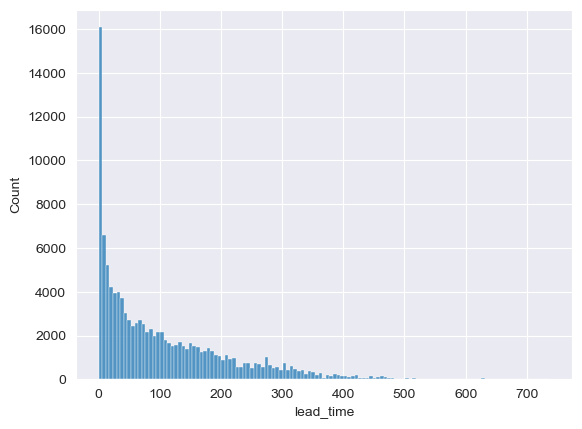

In [23]:
sns.histplot(data=numerical, x="lead_time");

In [24]:
numerical["lead_time_log"] = np.log(numerical["lead_time"])
X_lead_time = numerical[["lead_time"]]
y = numerical["is_cancelled"]

X_train, X_test, y_train, y_test = train_test_split(X_lead_time, y, test_size=0.2, random_state=42)

C:\Users\lvgui\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
prediction = model.predict(X_test)
accuracy_score(y_test, prediction)

0.6603033242218499

In [32]:
X_test.reset_index().head()

,id_booking,lead_time
0,31245,65
1,101297,14
2,118085,113
3,61307,65
4,72006,163


In [33]:
predict_probabilities = pd.DataFrame(model.predict_proba(X_test))
predict_probabilities = pd.concat(
    [predict_probabilities, X_test.reset_index()],
    axis=1
)

predict_probabilities.head()

,0,1,id_booking,lead_time
0,0.687286,0.312714,31245,65
1,0.747597,0.252403,101297,14
2,0.624017,0.375983,118085,113
3,0.687286,0.312714,61307,65
4,0.553324,0.446676,72006,163


<AxesSubplot: xlabel='lead_time', ylabel='1'>

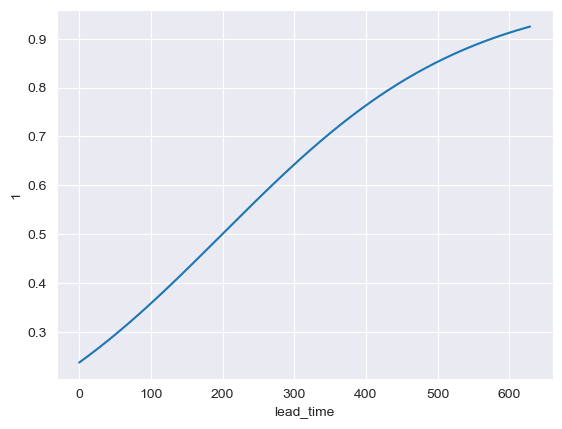

In [35]:
sns.lineplot(data=predict_probabilities, x="lead_time", y=1)

plt.title("Cancellation probability vs Lead Time")
plt.xlabel("")